In [218]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
le = LabelEncoder()
from sklearn.model_selection import train_test_split

In [219]:
df = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

In [220]:
df.head(40)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.00000,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.00000,36 months,7.90,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.00000,60 months,15.96,170.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1072053,1288686,3000,3000,3000.00000,36 months,18.64,109.43,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1071795,1306957,5600,5600,5600.00000,60 months,21.28,152.39,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1071570,1306721,5375,5375,5350.00000,60 months,12.69,121.45,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
df.shape

(466285, 75)

In [222]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [223]:
c_member = df['member_id'].duplicated()
np.where(c_member)[0]

array([], dtype=int64)

In [224]:
df['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [225]:
edit_term = [m.split(' ') for m in df['term']]
# edit_term[0][0]

for i in range(466285):
    del edit_term[i][0]
    del edit_term[i][1]
    
df['term'] = edit_term
df['term'] = [''.join(map(str, l)) for l in df['term']]
df['term']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: object

In [226]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [227]:
df['emp_length'] = df['emp_length'].fillna('10 years')

In [228]:
df = df.replace({'emp_length':{'< 1 year':0,'1 year':0,'2 years':0,'3 years':0,'4 years':1,'5 years':1,'6 years':1,
                                  '7 years':2,'8 years':2,'9 years':2,'10 years':3,'10+ years':3}})

In [229]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [230]:
df = df.replace({'grade':{'A':0 , 'B':0, 'C':1, 'D':1, 'E':2, 'F':2, 'G':3}})

In [231]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [232]:
df = df.replace({'home_ownership':{'ANY':0,'NONE':0,'OTHER':0,'OWN':1,'RENT':2,'MORTGAGE':3}})

In [233]:
df.drop(['application_type', 'sub_grade'],axis=1)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,1,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60,19.97,582.50,1,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60,16.99,514.34,1,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36,7.90,62.59,0,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [234]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [235]:
df['purpose'] = le.fit_transform(df['purpose'])

In [236]:
df['purpose'].unique()

array([ 1,  0, 11,  9, 13,  2,  4,  6,  7,  8, 12,  5, 10,  3])

In [237]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [238]:
df['verification_status'] = le.fit_transform(df['verification_status'])

In [239]:
df['verification_status'].unique()

array([2, 1, 0])

In [240]:
df['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [241]:
df['pymnt_plan'] = le.fit_transform(df['pymnt_plan'])

In [242]:
df['pymnt_plan'].unique()

array([0, 1])

In [263]:
df['acc_now_delinq'].value_counts(dropna=False)

0.0    464524
1.0      1623
2.0        92
6.0        29
3.0        11
4.0         4
5.0         2
Name: acc_now_delinq, dtype: int64

In [244]:
acc_now_delinq_mean = df['acc_now_delinq'].mean()
acc_now_delinq_mean

0.0040020932706496

In [245]:
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(6)

In [246]:
list(df['total_rec_int'].unique())

[861.07,
 435.17,
 603.65,
 2209.33,
 1009.07,
 631.38,
 3025.99,
 938.14,
 294.94,
 533.42,
 1177.52,
 1943.08,
 570.26,
 478.98,
 1393.42,
 270.17,
 2519.26,
 185.02,
 1149.5,
 259.96,
 7413.04,
 3330.44,
 1902.56,
 1536.31,
 475.25,
 823.48,
 0.0,
 719.11,
 484.79,
 1622.21,
 523.54,
 3061.08,
 4317.69,
 714.59,
 1848.94,
 2137.46,
 1357.2,
 1662.6,
 1125.28,
 4199.67,
 1149.76,
 1516.38,
 915.03,
 1226.89,
 65.86,
 2239.91,
 696.99,
 1724.57,
 282.67,
 1157.38,
 2374.34,
 4095.62,
 1205.47,
 1039.35,
 1748.21,
 9328.33,
 4876.1,
 1474.76,
 575.94,
 1979.33,
 4402.24,
 4225.77,
 3648.43,
 2252.27,
 2429.23,
 603.17,
 2742.43,
 1747.71,
 2265.85,
 3562.4,
 4522.34,
 1431.91,
 246.8,
 3346.47,
 2059.52,
 699.48,
 2413.22,
 1001.53,
 557.64,
 8003.76,
 6796.92,
 671.62,
 2443.16,
 430.3,
 1449.39,
 1280.84,
 6619.44,
 407.8,
 2685.36,
 1985.68,
 779.62,
 687.73,
 3694.9,
 732.14,
 932.3,
 9519.71,
 2361.27,
 3473.25,
 334.66,
 2022.71,
 493.16,
 7713.92,
 857.17,
 1150.84,
 993.71,
 67

In [247]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [248]:
df = df.replace({'loan_status':{'Current':1, 'Fully Paid':1, 'Does not meet the credit policy. Status:Fully Paid':1, 
                                    'Late (16-30 days)':1, 'In Grace Period':1, 'Charged Off':0, 'Late (31-120 days)':0, 
                                    'Default':0, 'Does not meet the credit policy. Status:Charged Off':0, }})

In [249]:
df['loan_status'].value_counts()

1    415317
0     50968
Name: loan_status, dtype: int64

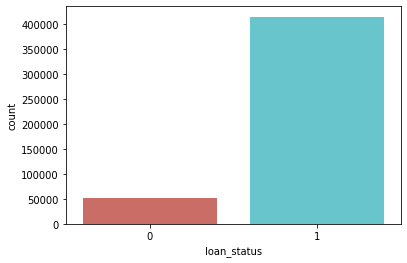

In [250]:
sns.countplot(x='loan_status', data=df, palette='hls')
plt.show()

In [268]:
group_1 = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 
           'installment', 'grade' , 'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
          'loan_status', 'pymnt_plan', 'purpose', 'total_rec_int', 'acc_now_delinq']
group_2= []

In [269]:
new_col = group_1
df_1 = df[new_col]
df_1.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,total_rec_int,acc_now_delinq
0,5000,5000,4975.0,36,10.65,162.87,0,3,2,24000.00,2,1,0,1,861.07,0.0
1,2500,2500,2500.0,60,15.27,59.83,1,0,2,30000.00,1,0,0,0,435.17,0.0
2,2400,2400,2400.0,36,15.96,84.33,1,3,2,12252.00,0,1,0,11,603.65,0.0
3,10000,10000,10000.0,36,13.49,339.31,1,3,2,49200.00,1,1,0,9,2209.33,0.0
4,3000,3000,3000.0,60,12.69,67.79,0,0,2,80000.00,1,1,0,9,1009.07,0.0
5,5000,5000,5000.0,36,7.90,156.46,0,0,2,36000.00,1,1,0,13,631.38,0.0
6,7000,7000,7000.0,60,15.96,170.08,1,2,2,47004.00,0,1,0,2,3025.99,0.0
7,3000,3000,3000.0,36,18.64,109.43,2,2,2,48000.00,1,1,0,0,938.14,0.0
8,5600,5600,5600.0,60,21.28,152.39,2,1,1,40000.00,1,0,0,11,294.94,0.0
9,5375,5375,5350.0,60,12.69,121.45,0,0,2,15000.00,2,0,0,9,533.42,0.0


In [275]:
df_1.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             4
verification_status    0
loan_status            0
pymnt_plan             0
purpose                0
total_rec_int          0
acc_now_delinq         0
dtype: int64

In [276]:
df_1 = df_1.dropna()

In [278]:
df_1.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
pymnt_plan             0
purpose                0
total_rec_int          0
acc_now_delinq         0
dtype: int64

In [279]:
df_1.groupby('loan_status').mean()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,total_rec_int,acc_now_delinq
loan_status,,,,,,,,,,,,,,
0,14596.853908,14551.695181,14392.666956,15.973236,441.747112,0.967588,1.523525,2.353810,65453.939742,1.146347,0.000078,2.959112,2399.185880,0.004316
1,14283.044655,14259.983314,14201.531056,13.566178,430.874791,0.627967,1.573163,2.423006,74237.489095,1.029768,0.000012,2.623925,2611.949274,0.004324


In [280]:
df_1.groupby('term').mean()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,total_rec_int,acc_now_delinq
term,,,,,,,,,,,,,,,
36,12209.087984,12196.938443,12115.769150,12.638667,408.112452,0.477036,1.515992,2.375474,70908.210515,0.909685,0.902914,0.000012,2.722887,1770.847397,0.004119
60,19869.225914,19808.653337,19770.079547,16.964663,495.135072,1.160311,1.704002,2.520696,79516.347242,1.392295,0.858508,0.000039,2.496439,4742.403202,0.004862


In [281]:
df_1.groupby('grade').mean()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,total_rec_int,acc_now_delinq
grade,,,,,,,,,,,,,,
0,13218.907348,13192.688109,13136.971429,10.101854,408.257230,1.541527,2.446769,75964.374245,0.882484,0.935522,0.000005,2.368508,1637.202209,0.002630
1,14526.339023,14510.302773,14443.383576,15.739414,432.404125,1.584931,2.391219,70102.867570,1.120407,0.870255,0.000025,2.758014,2923.016577,0.005238
2,17777.098559,17718.690034,17596.877172,21.314633,520.624954,1.607908,2.381415,73883.773603,1.380149,0.792675,0.000061,3.424693,5045.711558,0.007247
3,20610.791692,20543.701084,20217.370298,24.838393,623.125090,1.599940,2.394341,86232.858952,1.525286,0.721854,0.000000,4.081577,6671.951686,0.013546


In [282]:
df_1.groupby('emp_length').mean()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,total_rec_int,acc_now_delinq
emp_length,,,,,,,,,,,,,,
0,13358.785418,13328.932862,13220.067197,13.656729,407.460589,0.650217,2.308171,70089.471272,0.932417,0.887537,0.000028,2.748686,2334.001343,0.004227
1,13862.837862,13833.318023,13761.699028,13.781619,420.952068,0.655196,2.391454,71973.774565,0.982193,0.886149,0.000024,2.730617,2516.560457,0.003050
2,14557.517340,14537.191746,14484.924325,13.916141,438.518477,0.670599,2.456088,73774.439851,1.024329,0.888886,0.000015,2.593007,2628.452725,0.004529
3,15255.748669,15233.957248,15192.065699,13.964317,455.760219,0.680370,2.501768,76412.238421,1.172101,0.896304,0.000012,2.577930,2823.234057,0.004957


Text(0, 0.5, 'LS')

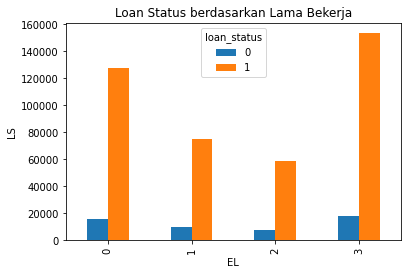

In [283]:
pd.crosstab(df.emp_length,df.loan_status).plot(kind='bar')
plt.title('Loan Status berdasarkan Lama Bekerja')
plt.xlabel('EL')
plt.ylabel('LS')

Text(0, 0.5, 'LS')

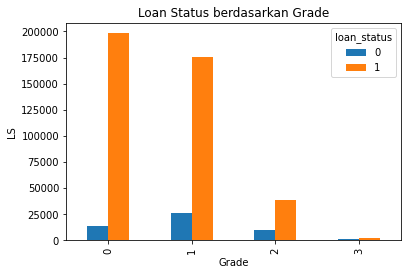

In [284]:
pd.crosstab(df.grade,df.loan_status).plot(kind='bar')
plt.title('Loan Status berdasarkan Grade')
plt.xlabel('Grade')
plt.ylabel('LS')

In [285]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [286]:
x = df_1.drop('loan_status', axis=1)
y = df_1['loan_status']

In [287]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [288]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(x, y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\steve\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\steve\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn import metrics

In [289]:
logreg.fit(X_train, y_train)

C:\Users\steve\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [290]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [294]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [304]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[    96  17621]
 [   196 145286]]


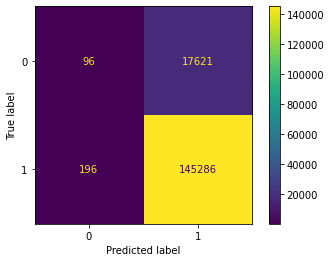

In [305]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()
plt.show()

In [292]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.01      0.01     17717
           1       0.89      1.00      0.94    145482

    accuracy                           0.89    163199
   macro avg       0.61      0.50      0.48    163199
weighted avg       0.83      0.89      0.84    163199



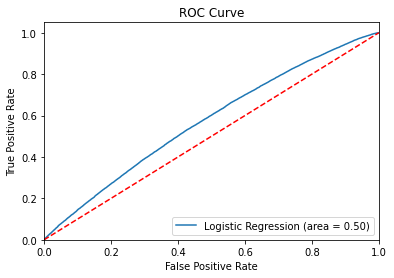

In [300]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [302]:
from sklearn import metrics

In [303]:
auc = metrics.accuracy_score(y_test, y_pred)
print(f'Nilai AUC : {auc}')

Nilai AUC : 0.8908265369273096


In [313]:
import scorecardpy as sc

In [309]:
target = 'loan_status'

In [310]:
bins = sc.woebin(df_1,target)

[INFO] creating woe binning ...
Binning on 466281 rows and 16 columns in 00:00:55


{'home_ownership': <Figure size 432x288 with 2 Axes>,
 'loan_amnt': <Figure size 432x288 with 2 Axes>,
 'pymnt_plan': <Figure size 432x288 with 2 Axes>,
 'funded_amnt': <Figure size 432x288 with 2 Axes>,
 'grade': <Figure size 432x288 with 2 Axes>,
 'acc_now_delinq': <Figure size 432x288 with 2 Axes>,
 'int_rate': <Figure size 432x288 with 2 Axes>,
 'emp_length': <Figure size 432x288 with 2 Axes>,
 'installment': <Figure size 432x288 with 2 Axes>,
 'term': <Figure size 432x288 with 2 Axes>,
 'annual_inc': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>,
 'funded_amnt_inv': <Figure size 432x288 with 2 Axes>,
 'total_rec_int': <Figure size 432x288 with 2 Axes>,
 'verification_status': <Figure size 432x288 with 2 Axes>}

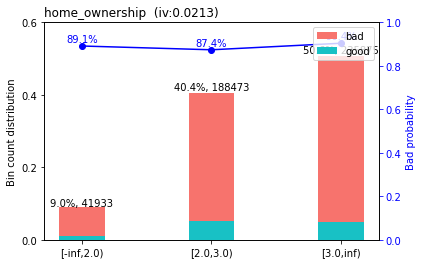

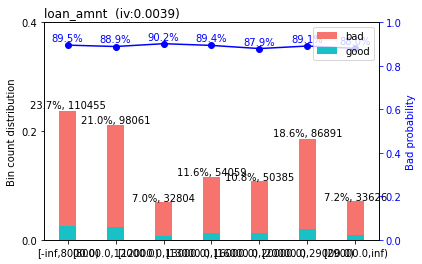

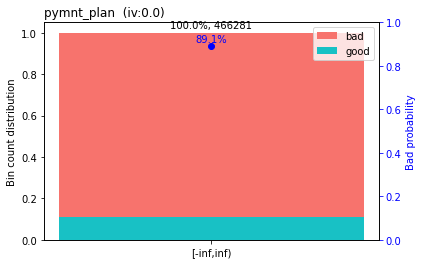

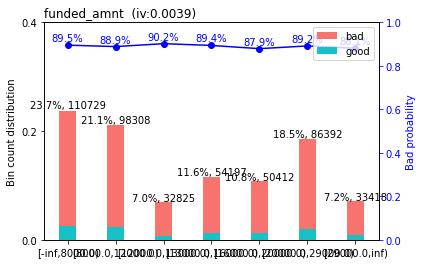

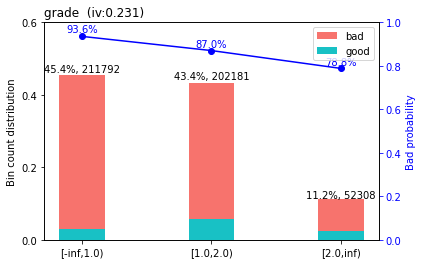

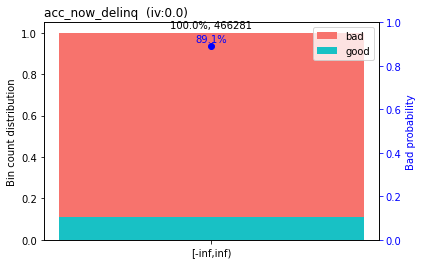

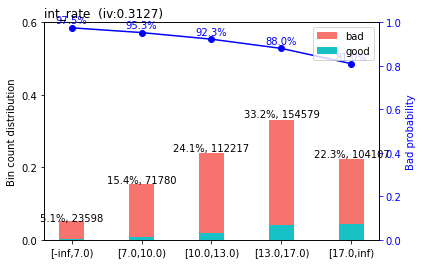

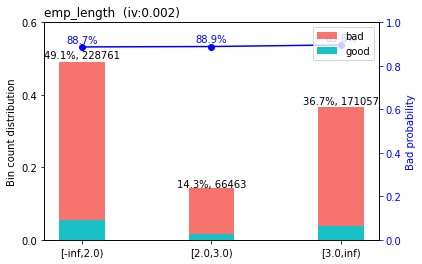

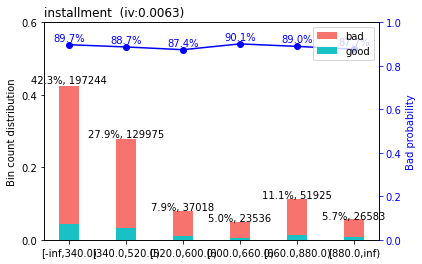

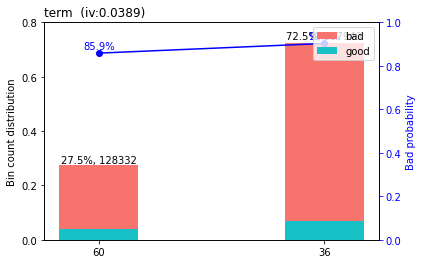

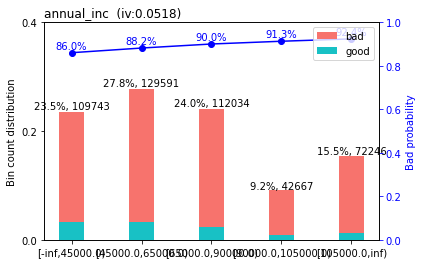

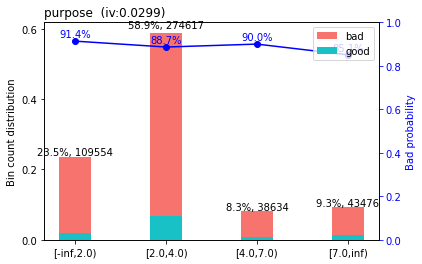

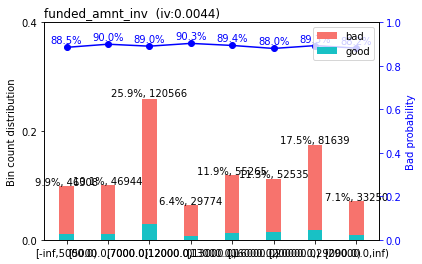

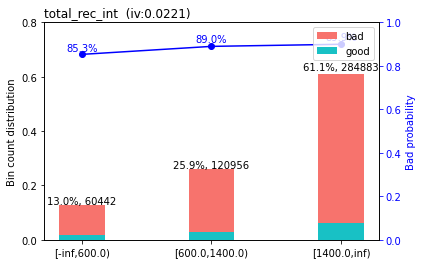

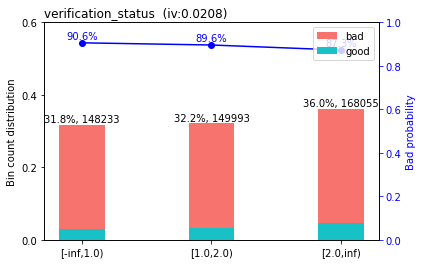

In [311]:
sc.woebin_plot(bins)